In [2]:
import pandas as pd
import Go_annotations
import GO_Enrichment_Calculator
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
solanum_hamsini_data = pd.read_csv('/data/suresh/pansol/fold_change/Slyc4_paralogs_fold_change.csv')

/tmp/ipykernel_199159/396071639.py:1: DtypeWarning: Columns (42,43,44,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  solanum_hamsini_data = pd.read_csv('/data/suresh/pansol/fold_change/Slyc4_paralogs_fold_change.csv')


In [4]:
tf_list = pd.read_csv('/data/passala/Collaborator_Data/Zach_Pan_solanum_Data/TF_metabolism_lists/solanum_tf_list.txt', sep = '\t')
tf_list['TF_ID'] = tf_list['TF_ID'].str.split('.').str[0]

In [5]:
tomato_annotations = Go_annotations.get_go_annotations_as_panda('tomato')
tomato_annotations

GO_term,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001215,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289
NetworkIDs,,,,,,,,,,,,,,,,,,,,,
2-CP1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2-CP2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20ox-3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3OH-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5PT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ureD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vsf-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
wee1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
tomato_converter = pd.read_csv('/data/CoCoCoNet/geneInfo/tomato_info.csv')


In [7]:
tomato_annotations = tomato_annotations.merge(right = tomato_converter[['EnsemblID','NetworkIDs']], right_on = 'NetworkIDs', left_index= True )
tomato_annotations = tomato_annotations.set_index('EnsemblID').drop(columns='NetworkIDs')

In [8]:
tomato_annotations.index =tomato_annotations.index.str.split(".").str[0]

In [9]:
tomato_annotations = tomato_annotations[~tomato_annotations.index.duplicated(keep='first')]

In [10]:
tomato_annotations

,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001215,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc10g082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g007740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g072310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc03g119910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g077210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc02g031980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc04g081190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc09g074830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
solanum_hamsini_data

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,dosage_tissue,dosage,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5
0,Solyc01g066020,Solyc05g024370,OG0000005,4,0.278587,0.343295,0.386926,0.715198,1.943432,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,apices,NaN,NaN
1,Solyc01g066020,Solyc11g011080,OG0000005,4,0.278587,4.115955,0.386926,5.415730,4.411692,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,root,NaN,NaN
2,Solyc01g066020,Solyc11g011350,OG0000005,4,0.278587,1.409697,0.386926,1.854865,2.553845,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,root,NaN,NaN
3,Solyc05g024370,Solyc11g011080,OG0000005,4,0.343295,4.115955,0.715198,5.415730,3.299126,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,apices,root,NaN,NaN
4,Solyc05g024370,Solyc11g011350,OG0000005,4,0.343295,1.409697,0.715198,1.854865,0.290322,3-5,...,NaN,NaN,NaN,NaN,NaN,balanced,apices,root,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75997,Solyc01g102560,Solyc01g102590,OG0035482,2,134.093632,68.645296,176.438989,90.322758,1.210764,2,...,NaN,NaN,compdrift_auroc0.9,comp_drift_sym,comp_drift_sym,dominant,leaves,leaves,comp_drift_sym,comp_drift_sym
75998,Solyc02g030313,Solyc09g018233,OG0035621,2,0.000000,0.000000,0.000000,0.000000,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,apices,apices,NaN,NaN
75999,Solyc04g081700,Solyc08g023645,OG0036305,2,0.138203,0.253665,0.345507,0.333770,0.743877,2,...,NaN,NaN,NaN,NaN,NaN,balanced,flower,root,NaN,NaN
76000,Solyc05g041173,Solyc09g057505,OG0036473,2,0.001594,0.000000,0.007970,0.000000,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,apices,apices,NaN,NaN


In [12]:
all_genes = solanum_hamsini_data["Gene1"].to_list()
all_genes.extend(solanum_hamsini_data['Gene2'].to_list()) 
full_list_of_hamsini_genes = list(set(all_genes))

In [13]:
len(full_list_of_hamsini_genes)

10350

In [14]:
all_genes_background =len(full_list_of_hamsini_genes)

In [15]:
fair_tomato_annotations = tomato_annotations.loc[tomato_annotations.index.isin(full_list_of_hamsini_genes)]

In [16]:
fair_tomato_annotations

,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001215,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc08g068680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g006740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g096630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc06g007520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc07g049530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc12g010860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc07g053260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g005670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
metabolic_gene_list_LOC = tomato_annotations.loc[tomato_annotations['GO:0008152'] ==1]
metabolic_gene_list_LOC = metabolic_gene_list_LOC.index.to_frame()
metabolic_gene_list_LOC.index.name = None

In [18]:
fair_tomato_annotations

,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001215,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc08g068680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g006740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g096630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc06g007520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc07g049530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc12g010860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc07g053260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g005670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
metabolic_gene_list_LOC

,EnsemblID
Solyc10g082030,Solyc10g082030
Solyc01g007740,Solyc01g007740
Solyc11g072310,Solyc11g072310
Solyc03g119910,Solyc03g119910
Solyc08g077210,Solyc08g077210
...,...
Solyc02g078910,Solyc02g078910
Solyc11g005670,Solyc11g005670
Solyc02g031980,Solyc02g031980
Solyc09g074830,Solyc09g074830


In [20]:
solanum_hamsini_data.columns

Index(['Gene1', 'Gene2', 'OGs', 'num_paralogs', 'exp1', 'exp2', 'exp1_exc0',
       'exp2_exc0', 'avg_logFC', 'num_paralogs2', 'Node', 'tau1', 'tau2',
       'tau_mean', 'tau_diff', 'ps1', 'ps2', 'pseudogene', 'total_exp',
       'no_exp', 'low_exp', 'expressolog_corr', 'expressolog', 'seq_sim',
       'duptype', 'Ka', 'Ks', 'Ka.Ks', 'coexp_tissue', 'FC_tissue',
       'spec_tissue', 'numtissue', 'new_coexp_tissue', 'log2FC_min_tissue',
       'log2FC_max_tissue', 'log2FC_mean_tissue', 'log2FC_sd_tissue', 'origin',
       'domestication_status', 'dosage_cons', 'dosage_div', 'dosage_tissue',
       'dosage', 'classification1', 'classification2', 'classification3',
       'gtype', 'gene1_tissue', 'gene2_tissue', 'classification4',
       'classification5'],
      dtype='object')

In [21]:
full_list_of_hamsini_genes

['Solyc07g008380',
 'Solyc09g089490',
 'Solyc02g084110',
 'Solyc11g011373',
 'Solyc04g056470',
 'Solyc07g055400',
 'Solyc12g099980',
 'Solyc05g023755',
 'Solyc00g244290',
 'Solyc02g022870',
 'Solyc03g007250',
 'Solyc01g107540',
 'Solyc10g055120',
 'Solyc02g093250',
 'Solyc08g150122',
 'Solyc01g009620',
 'Solyc01g008479',
 'Solyc04g011870',
 'Solyc06g073155',
 'Solyc09g064690',
 'Solyc11g045640',
 'Solyc03g034330',
 'Solyc01g065840',
 'Solyc06g075270',
 'Solyc08g069235',
 'Solyc02g031890',
 'Solyc10g018190',
 'Solyc01g107090',
 'Solyc03g114960',
 'Solyc02g071720',
 'Solyc08g077620',
 'Solyc02g086630',
 'Solyc09g018010',
 'Solyc12g021190',
 'Solyc02g069585',
 'Solyc05g047643',
 'Solyc01g103590',
 'Solyc10g018203',
 'Solyc02g088880',
 'Solyc09g008950',
 'Solyc06g051230',
 'Solyc01g109160',
 'Solyc07g021740',
 'Solyc09g005610',
 'Solyc02g091010',
 'Solyc04g072435',
 'Solyc05g005940',
 'Solyc03g114540',
 'Solyc08g015730',
 'Solyc02g079820',
 'Solyc02g011960',
 'Solyc03g005260',
 'Solyc12g01

In [22]:
ham_data_trimmed_normal_ks = solanum_hamsini_data.loc[(solanum_hamsini_data['Ks']<2.5)&((solanum_hamsini_data['Ks']>0.05))]

In [23]:
ham_data_trimmed_normal_ks

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,dosage_tissue,dosage,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5
0,Solyc01g066020,Solyc05g024370,OG0000005,4,0.278587,0.343295,0.386926,0.715198,1.943432,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,apices,NaN,NaN
1,Solyc01g066020,Solyc11g011080,OG0000005,4,0.278587,4.115955,0.386926,5.415730,4.411692,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,root,NaN,NaN
2,Solyc01g066020,Solyc11g011350,OG0000005,4,0.278587,1.409697,0.386926,1.854865,2.553845,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,root,NaN,NaN
3,Solyc05g024370,Solyc11g011080,OG0000005,4,0.343295,4.115955,0.715198,5.415730,3.299126,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,apices,root,NaN,NaN
4,Solyc05g024370,Solyc11g011350,OG0000005,4,0.343295,1.409697,0.715198,1.854865,0.290322,3-5,...,NaN,NaN,NaN,NaN,NaN,balanced,apices,root,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75992,Solyc10g076650,Solyc10g076995,OG0032568,2,0.403124,9.429800,0.629881,12.407631,6.179267,2,...,NaN,NaN,diverged,diverged,diverged_subfn,dominant,flower,root,diverged_drift_asym,diverged
75994,Solyc12g049611,Solyc12g049614,OG0032660,3,9.611096,0.013833,12.646180,0.086455,7.400903,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,root,leaves,NaN,NaN
75995,Solyc12g049611,Solyc12g049616,OG0032660,3,9.611096,1.381619,12.646180,1.817920,4.042687,3-5,...,NaN,NaN,compdrift_auroc0.5,NaN,NaN,dominant,root,apices,NaN,NaN
75996,Solyc12g049614,Solyc12g049616,OG0032660,3,0.013833,1.381619,0.086455,1.817920,4.895206,3-5,...,NaN,NaN,NaN,NaN,NaN,dominant,leaves,apices,NaN,NaN


In [24]:
all_genes = ham_data_trimmed_normal_ks["Gene1"].to_list()
all_genes.extend(ham_data_trimmed_normal_ks['Gene2'].to_list()) 
len(list(set(all_genes)))

6219

In [25]:
segdups = ham_data_trimmed_normal_ks.loc[ham_data_trimmed_normal_ks['duptype'].isin(['tandem','proximal'])]
segdups

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,dosage_tissue,dosage,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5
17246,Solyc11g071390,Solyc11g071420,OG0000020,7,0.051036,0.506033,0.141766,0.702824,0.403780,6-10,...,NaN,NaN,NaN,NaN,NaN,balanced,fruit,root,NaN,NaN
17248,Solyc11g071420,Solyc11g071430,OG0000020,7,0.506033,1.607959,0.702824,2.115735,3.748822,6-10,...,NaN,NaN,NaN,NaN,NaN,dominant,root,flower,NaN,NaN
17256,Solyc01g005720,Solyc01g005730,OG0000023,10,0.268897,0.625456,0.672242,1.954550,1.153672,6-10,...,NaN,NaN,NaN,NaN,NaN,balanced,flower,leaves,NaN,NaN
17273,Solyc01g005760,Solyc01g005780,OG0000023,10,4.563034,0.330755,6.003992,0.435204,1.623524,6-10,...,NaN,NaN,NaN,NaN,NaN,balanced,fruit,coty,NaN,NaN
17298,Solyc01g009690,Solyc01g009700,OG0000023,10,0.456363,0.187206,0.950757,0.468015,0.242345,6-10,...,NaN,NaN,NaN,NaN,NaN,balanced,root,root,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75980,Solyc07g056617,Solyc07g056685,OG0032439,2,0.223294,0.800052,0.797477,2.500162,0.073658,2,...,NaN,NaN,NaN,NaN,NaN,balanced,fruit,fruit,NaN,NaN
75982,Solyc08g062100,Solyc08g062110,OG0032458,2,0.005190,0.105166,0.129747,0.525830,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,leaves,fruit,NaN,NaN
75990,Solyc10g018305,Solyc10g018310,OG0032540,2,0.207546,6.992004,0.273087,9.200006,5.062227,2,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,coty,NaN,NaN
75995,Solyc12g049611,Solyc12g049616,OG0032660,3,9.611096,1.381619,12.646180,1.817920,4.042687,3-5,...,NaN,NaN,compdrift_auroc0.5,NaN,NaN,dominant,root,apices,NaN,NaN


In [26]:
all_segdups_genes = segdups["Gene1"].to_list()
all_segdups_genes.extend(segdups['Gene2'].to_list()) 
all_segdups_genes = list(set(all_segdups_genes))
len(all_segdups_genes)

1752

In [27]:
wgd_dups = ham_data_trimmed_normal_ks.loc[ham_data_trimmed_normal_ks['duptype'] == 'WGD']
wgd_dups

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,dosage_tissue,dosage,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5
17250,Solyc02g072470,Solyc03g006080,OG0000021,4,0.435026,1.538663,0.604202,2.024557,1.194717,3-5,...,NaN,NaN,NaN,NaN,NaN,balanced,fruit,root,NaN,NaN
17453,Solyc02g077480,Solyc10g008910,OG0000034,12,2104.112798,1702.054917,2768.569470,2239.545944,0.546279,>10,...,NaN,NaN,compdrift_auroc0.9,conserved,conserved,balanced,apices,apices,conserved,conserved
17459,Solyc04g074580,Solyc11g010230,OG0000034,12,1376.175526,1301.136505,1810.757272,1712.021718,0.032565,>10,...,NaN,NaN,conserved_auroc0.9,conserved,conserved,balanced,apices,coty,conserved,conserved
17466,Solyc05g051500,Solyc11g010230,OG0000034,12,590.961160,1301.136505,777.580473,1712.021718,1.507692,>10,...,NaN,NaN,compdrift_auroc0.9,comp_drift_sym,comp_drift_sym,dominant,apices,coty,comp_drift_sym,comp_drift_sym
17489,Solyc04g011500,Solyc05g054480,OG0000035,10,113.587716,12.973478,149.457521,17.070366,5.234061,6-10,...,NaN,NaN,compdrift_auroc0.7,NaN,NaN,dominant,flower,apices,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74932,Solyc04g081870,Solyc12g089380,OG0022623,2,48.900984,1.242577,64.343400,2.218887,5.879242,2,...,NaN,NaN,diverged,diverged,diverged_subfn,dominant,flower,root,diverged_drift_asym,diverged
75646,Solyc07g007400,Solyc12g009870,OG0026425,2,10.011134,0.001263,13.904353,0.015788,5.746200,2,...,NaN,NaN,NaN,NaN,NaN,dominant,fruit,coty,NaN,NaN
75758,Solyc07g054550,Solyc08g068450,OG0027989,2,0.011253,0.014399,0.281317,0.179983,0.047435,2,...,NaN,NaN,NaN,NaN,NaN,NaN,apices,leaves,NaN,NaN
75825,Solyc06g005320,Solyc06g075670,OG0028952,2,0.312547,3.426774,1.562733,10.708668,2.983945,2,...,NaN,NaN,NaN,NaN,NaN,dominant,root,root,NaN,NaN


In [28]:
all_wgd_genes = wgd_dups["Gene1"].to_list()
all_wgd_genes.extend(wgd_dups['Gene2'].to_list()) 
all_wgd_genes = list(set(all_wgd_genes))
len(all_wgd_genes)

1258

In [29]:
tomato_wgdd_list = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/gene_pairs/pairs/Sly.wgd.pairs',sep = '\t')
tomato_wgdd_list

,Duplicate 1,Location,Duplicate 2,Location.1,E-value
0,Solyc00g007330.1.1,Sly-SL2.40ch00:7004447,Solyc00g012540.1.1,Sly-SL2.40ch00:10522603,8.000000e-162
1,Solyc00g008030.1.1,Sly-SL2.40ch00:7554160,Solyc00g014170.1.1,Sly-SL2.40ch00:10915484,5.000000e-43
2,Solyc00g008050.1.1,Sly-SL2.40ch00:7615934,Solyc00g014180.1.1,Sly-SL2.40ch00:10918360,2.000000e-21
3,Solyc00g008130.1.1,Sly-SL2.40ch00:7679694,Solyc00g014190.1.1,Sly-SL2.40ch00:10934339,4.000000e-13
4,Solyc00g008690.1.1,Sly-SL2.40ch00:8506115,Solyc00g015610.1.1,Sly-SL2.40ch00:11213131,4.000000e-26
...,...,...,...,...,...
4104,Solyc12g049030.1.1,Sly-SL2.40ch12:45906133,Solyc12g100230.1.1,Sly-SL2.40ch12:65365071,0.000000e+00
4105,Solyc12g049150.1.1,Sly-SL2.40ch12:46025362,Solyc12g100100.1.1,Sly-SL2.40ch12:65296963,3.000000e-25
4106,Solyc12g049160.1.1,Sly-SL2.40ch12:46028509,Solyc12g100090.1.1,Sly-SL2.40ch12:65294418,1.000000e-137
4107,Solyc12g049170.1.1,Sly-SL2.40ch12:46031528,Solyc12g100080.1.1,Sly-SL2.40ch12:65292063,3.000000e-26


In [30]:
tomato_wgdd_list['Duplicate 1'] = tomato_wgdd_list['Duplicate 1'].str.split('.').str[0]
tomato_wgdd_list['Duplicate 2'] = tomato_wgdd_list['Duplicate 2'].str.split('.').str[0]
tomato_wgdd_list


,Duplicate 1,Location,Duplicate 2,Location.1,E-value
0,Solyc00g007330,Sly-SL2.40ch00:7004447,Solyc00g012540,Sly-SL2.40ch00:10522603,8.000000e-162
1,Solyc00g008030,Sly-SL2.40ch00:7554160,Solyc00g014170,Sly-SL2.40ch00:10915484,5.000000e-43
2,Solyc00g008050,Sly-SL2.40ch00:7615934,Solyc00g014180,Sly-SL2.40ch00:10918360,2.000000e-21
3,Solyc00g008130,Sly-SL2.40ch00:7679694,Solyc00g014190,Sly-SL2.40ch00:10934339,4.000000e-13
4,Solyc00g008690,Sly-SL2.40ch00:8506115,Solyc00g015610,Sly-SL2.40ch00:11213131,4.000000e-26
...,...,...,...,...,...
4104,Solyc12g049030,Sly-SL2.40ch12:45906133,Solyc12g100230,Sly-SL2.40ch12:65365071,0.000000e+00
4105,Solyc12g049150,Sly-SL2.40ch12:46025362,Solyc12g100100,Sly-SL2.40ch12:65296963,3.000000e-25
4106,Solyc12g049160,Sly-SL2.40ch12:46028509,Solyc12g100090,Sly-SL2.40ch12:65294418,1.000000e-137
4107,Solyc12g049170,Sly-SL2.40ch12:46031528,Solyc12g100080,Sly-SL2.40ch12:65292063,3.000000e-26


In [31]:
tomato_wgdd_all_genes = tomato_wgdd_list["Duplicate 1"].to_list()
tomato_wgdd_all_genes.extend(tomato_wgdd_list['Duplicate 2'].to_list()) 
tomato_wgdd_all_genes = list(set(tomato_wgdd_all_genes))
len(tomato_wgdd_all_genes)

6634

In [32]:
len(list(set(tomato_wgdd_all_genes) & set(all_wgd_genes)))

1105

In [31]:
tf_merged_wgd = wgd_dups.merge(left_on= 'Gene1', right_on='TF_ID', how = 'left', right= tf_list)
tf_merged_wgd = tf_merged_wgd.rename(columns = {'TF_ID':'TF_ID_Gene1','Gene_ID':'Gene_ID_1','Family':'Family_1'})
second_tf_merge_wgd = tf_merged_wgd.merge(left_on= 'Gene2', right_on='TF_ID', how = 'left', right= tf_list)
second_tf_merge_wgd

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,gene1_tissue,gene2_tissue,classification4,classification5,TF_ID_Gene1,Gene_ID_1,Family_1,TF_ID,Gene_ID,Family
0,Solyc02g072470,Solyc03g006080,OG0000021,4,0.435026,1.538663,0.604202,2.024557,1.194717,3-5,...,fruit,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Solyc02g077480,Solyc10g008910,OG0000034,12,2104.112798,1702.054917,2768.569470,2239.545944,0.546279,>10,...,apices,apices,conserved,conserved,NaN,NaN,NaN,NaN,NaN,NaN
2,Solyc04g074580,Solyc11g010230,OG0000034,12,1376.175526,1301.136505,1810.757272,1712.021718,0.032565,>10,...,apices,coty,conserved,conserved,NaN,NaN,NaN,NaN,NaN,NaN
3,Solyc05g051500,Solyc11g010230,OG0000034,12,590.961160,1301.136505,777.580473,1712.021718,1.507692,>10,...,apices,coty,comp_drift_sym,comp_drift_sym,NaN,NaN,NaN,NaN,NaN,NaN
4,Solyc04g011500,Solyc05g054480,OG0000035,10,113.587716,12.973478,149.457521,17.070366,5.234061,6-10,...,flower,apices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Solyc04g081870,Solyc12g089380,OG0022623,2,48.900984,1.242577,64.343400,2.218887,5.879242,2,...,flower,root,diverged_drift_asym,diverged,NaN,NaN,NaN,NaN,NaN,NaN
683,Solyc07g007400,Solyc12g009870,OG0026425,2,10.011134,0.001263,13.904353,0.015788,5.746200,2,...,fruit,coty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,Solyc07g054550,Solyc08g068450,OG0027989,2,0.011253,0.014399,0.281317,0.179983,0.047435,2,...,apices,leaves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
685,Solyc06g005320,Solyc06g075670,OG0028952,2,0.312547,3.426774,1.562733,10.708668,2.983945,2,...,root,root,NaN,NaN,NaN,NaN,NaN,Solyc06g075670,Solyc06g075670.1,MYB_related


In [32]:
final_tf_wgd = second_tf_merge_wgd.loc[~(second_tf_merge_wgd['TF_ID_Gene1'].isna())|~(second_tf_merge_wgd['TF_ID'].isna())]

In [33]:
all_genes = final_tf_wgd["Gene1"].to_list()
all_genes.extend(final_tf_wgd['Gene2'].to_list()) 
len(list(set(all_genes)))

30

In [34]:
tf_merged_seg = segdups.merge(left_on= 'Gene1', right_on='TF_ID', how = 'left', right= tf_list)
tf_merged_seg = tf_merged_seg.rename(columns = {'TF_ID':'TF_ID_Gene1','Gene_ID':'Gene_ID_1','Family':'Family_1'})
second_tf_merge_seg = tf_merged_seg.merge(left_on= 'Gene2', right_on='TF_ID', how = 'left', right= tf_list)
second_tf_merge_seg

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,gene1_tissue,gene2_tissue,classification4,classification5,TF_ID_Gene1,Gene_ID_1,Family_1,TF_ID,Gene_ID,Family
0,Solyc11g071390,Solyc11g071420,OG0000020,7,0.051036,0.506033,0.141766,0.702824,0.403780,6-10,...,fruit,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Solyc11g071420,Solyc11g071430,OG0000020,7,0.506033,1.607959,0.702824,2.115735,3.748822,6-10,...,root,flower,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Solyc01g005720,Solyc01g005730,OG0000023,10,0.268897,0.625456,0.672242,1.954550,1.153672,6-10,...,flower,leaves,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Solyc01g005760,Solyc01g005780,OG0000023,10,4.563034,0.330755,6.003992,0.435204,1.623524,6-10,...,fruit,coty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Solyc01g009690,Solyc01g009700,OG0000023,10,0.456363,0.187206,0.950757,0.468015,0.242345,6-10,...,root,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Solyc07g056617,Solyc07g056685,OG0032439,2,0.223294,0.800052,0.797477,2.500162,0.073658,2,...,fruit,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,Solyc08g062100,Solyc08g062110,OG0032458,2,0.005190,0.105166,0.129747,0.525830,NaN,2,...,leaves,fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,Solyc10g018305,Solyc10g018310,OG0032540,2,0.207546,6.992004,0.273087,9.200006,5.062227,2,...,fruit,coty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Solyc12g049611,Solyc12g049616,OG0032660,3,9.611096,1.381619,12.646180,1.817920,4.042687,3-5,...,root,apices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
final_seg_tf = second_tf_merge_seg.loc[~(second_tf_merge_seg['TF_ID_Gene1'].isna())|~(second_tf_merge_seg['TF_ID'].isna())]

In [36]:
final_seg_tf

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,gene1_tissue,gene2_tissue,classification4,classification5,TF_ID_Gene1,Gene_ID_1,Family_1,TF_ID,Gene_ID,Family
22,Solyc01g108940,Solyc01g108950,OG0000063,4,0.517393,0.070382,0.718601,0.125682,2.056149,3-5,...,fruit,coty,NaN,NaN,Solyc01g108940,Solyc01g108940.1,B3,Solyc01g108950,Solyc01g108950.1,B3
113,Solyc07g052700,Solyc07g052720,OG0000231,5,9.452871,16.894995,12.437988,22.230257,0.637943,3-5,...,apices,apices,conserved,conserved,Solyc07g052700,Solyc07g052700.2,M-type_MADS,NaN,NaN,NaN
129,Solyc09g066030,Solyc09g066050,OG0000245,15,0.001762,0.047410,0.022031,0.098772,0.906227,>10,...,apices,leaves,NaN,NaN,Solyc09g066030,Solyc09g066030.1,HD-ZIP,NaN,NaN,NaN
153,Solyc02g061870,Solyc02g061900,OG0000304,7,0.186415,0.081217,1.553459,0.253804,0.005631,6-10,...,fruit,apices,NaN,NaN,Solyc02g061870,Solyc02g061870.1,NAC,Solyc02g061900,Solyc02g061900.1,NAC
154,Solyc02g061900,Solyc02g061910,OG0000304,7,0.081217,0.159758,0.253804,0.332830,0.665653,6-10,...,apices,apices,NaN,NaN,Solyc02g061900,Solyc02g061900.1,NAC,Solyc02g061910,Solyc02g061910.1,NAC
155,Solyc02g062060,Solyc02g062090,OG0000304,7,0.043078,0.051339,0.538476,0.160434,2.942308,6-10,...,apices,root,NaN,NaN,Solyc02g062060,Solyc02g062060.1,NAC,Solyc02g062090,Solyc02g062090.1,NAC
156,Solyc02g062070,Solyc02g062080,OG0000304,7,0.008305,0.005172,0.103813,0.129312,0.373288,6-10,...,apices,apices,NaN,NaN,Solyc02g062070,Solyc02g062070.1,NAC,NaN,NaN,NaN
157,Solyc02g062080,Solyc02g062090,OG0000304,7,0.005172,0.051339,0.129312,0.160434,0.016530,6-10,...,apices,root,NaN,NaN,NaN,NaN,NaN,Solyc02g062090,Solyc02g062090.1,NAC
175,Solyc01g098050,Solyc01g098060,OG0000342,4,0.037401,0.187712,0.311675,0.391066,0.859365,3-5,...,leaves,apices,NaN,NaN,Solyc01g098050,Solyc01g098050.1,M-type_MADS,Solyc01g098060,Solyc01g098060.1,M-type_MADS
176,Solyc01g098060,Solyc01g098070,OG0000342,4,0.187712,0.217045,0.391066,1.808707,1.537674,3-5,...,apices,fruit,NaN,NaN,Solyc01g098060,Solyc01g098060.1,M-type_MADS,Solyc01g098070,Solyc01g098070.1,M-type_MADS


In [37]:
all_seg_tf_genes = final_seg_tf["Gene1"].to_list()
all_seg_tf_genes.extend(final_seg_tf['Gene2'].to_list()) 
all_seg_tf_genes = list(set(all_seg_tf_genes))
len(all_seg_tf_genes)

61

In [38]:
metabolic_gene_list_LOC

,EnsemblID
Solyc10g082030,Solyc10g082030
Solyc01g007740,Solyc01g007740
Solyc11g072310,Solyc11g072310
Solyc03g119910,Solyc03g119910
Solyc08g077210,Solyc08g077210
...,...
Solyc02g078910,Solyc02g078910
Solyc11g005670,Solyc11g005670
Solyc02g031980,Solyc02g031980
Solyc09g074830,Solyc09g074830


In [39]:
meta_merged_wgd = wgd_dups.merge(left_on= 'Gene1', right_on='EnsemblID', how = 'left', right= metabolic_gene_list_LOC)
meta_merged_wgd = meta_merged_wgd.rename(columns = {'EnsemblID':'EnsemblID_1','NetworkIDs':'NetworkIDs_1'})
second_meta_merge_wgd = meta_merged_wgd.merge(left_on= 'Gene2', right_on='EnsemblID', how = 'left', right= metabolic_gene_list_LOC)
second_meta_merge_wgd

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5,EnsemblID_1,EnsemblID
0,Solyc02g072470,Solyc03g006080,OG0000021,4,0.435026,1.538663,0.604202,2.024557,1.194717,3-5,...,NaN,NaN,NaN,balanced,fruit,root,NaN,NaN,NaN,NaN
1,Solyc02g077480,Solyc10g008910,OG0000034,12,2104.112798,1702.054917,2768.569470,2239.545944,0.546279,>10,...,compdrift_auroc0.9,conserved,conserved,balanced,apices,apices,conserved,conserved,NaN,NaN
2,Solyc04g074580,Solyc11g010230,OG0000034,12,1376.175526,1301.136505,1810.757272,1712.021718,0.032565,>10,...,conserved_auroc0.9,conserved,conserved,balanced,apices,coty,conserved,conserved,NaN,NaN
3,Solyc05g051500,Solyc11g010230,OG0000034,12,590.961160,1301.136505,777.580473,1712.021718,1.507692,>10,...,compdrift_auroc0.9,comp_drift_sym,comp_drift_sym,dominant,apices,coty,comp_drift_sym,comp_drift_sym,NaN,NaN
4,Solyc04g011500,Solyc05g054480,OG0000035,10,113.587716,12.973478,149.457521,17.070366,5.234061,6-10,...,compdrift_auroc0.7,NaN,NaN,dominant,flower,apices,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Solyc04g081870,Solyc12g089380,OG0022623,2,48.900984,1.242577,64.343400,2.218887,5.879242,2,...,diverged,diverged,diverged_subfn,dominant,flower,root,diverged_drift_asym,diverged,NaN,NaN
683,Solyc07g007400,Solyc12g009870,OG0026425,2,10.011134,0.001263,13.904353,0.015788,5.746200,2,...,NaN,NaN,NaN,dominant,fruit,coty,NaN,NaN,NaN,Solyc12g009870
684,Solyc07g054550,Solyc08g068450,OG0027989,2,0.011253,0.014399,0.281317,0.179983,0.047435,2,...,NaN,NaN,NaN,NaN,apices,leaves,NaN,NaN,NaN,NaN
685,Solyc06g005320,Solyc06g075670,OG0028952,2,0.312547,3.426774,1.562733,10.708668,2.983945,2,...,NaN,NaN,NaN,dominant,root,root,NaN,NaN,NaN,NaN


In [40]:
second_meta_merge_wgd.loc[~(second_meta_merge_wgd['EnsemblID_1'].isna())]

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5,EnsemblID_1,EnsemblID
6,Solyc01g095490,Solyc03g007470,OG0000051,11,7.006839,57.990835,9.219525,76.303730,3.093384,>10,...,compdrift_auroc0.5,NaN,NaN,dominant,flower,root,NaN,NaN,Solyc01g095490,NaN
7,Solyc01g095490,Solyc10g011740,OG0000051,11,7.006839,20.444956,9.219525,26.901258,1.152274,>10,...,compdrift_auroc0.5,NaN,NaN,balanced,flower,leaves,NaN,NaN,Solyc01g095490,Solyc10g011740
8,Solyc02g083570,Solyc03g033410,OG0000051,11,42.068209,2.167149,55.352907,4.514894,4.127863,>10,...,compdrift_auroc0.7,NaN,NaN,dominant,flower,leaves,NaN,NaN,Solyc02g083570,NaN
9,Solyc06g007510,Solyc06g082595,OG0000051,11,231.414841,45.299847,304.493211,59.605062,2.379377,>10,...,compdrift_auroc0.7,NaN,NaN,dominant,fruit,root,NaN,NaN,Solyc06g007510,NaN
10,Solyc08g008220,Solyc12g056100,OG0000051,11,263.703918,127.181244,346.978839,167.343742,1.188175,>10,...,compdrift_auroc0.7,NaN,NaN,dominant,flower,fruit,NaN,NaN,Solyc08g008220,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Solyc07g056140,Solyc12g011120,OG0004907,2,104.708593,0.311087,137.774465,1.944293,8.434280,2,...,diverged,diverged,diverged_subfn,dominant,fruit,flower,diverged_drift_asym,diverged,Solyc07g056140,NaN
668,Solyc09g092380,Solyc12g098500,OG0004945,3,905.293144,44.316251,1191.175189,58.310856,4.184010,3-5,...,diverged,diverged,diverged_subfn,dominant,fruit,flower,diverged_drift_asym,diverged,Solyc09g092380,Solyc12g098500
671,Solyc01g010860,Solyc05g007460,OG0005368,2,5.955104,7.170888,7.835664,9.435379,0.057645,2,...,compdrift_auroc0.9,conserved,conserved,balanced,flower,flower,conserved,conserved,Solyc01g010860,Solyc05g007460
672,Solyc04g078620,Solyc12g088680,OG0005536,2,15.566927,7.573952,20.482799,9.965726,1.173254,2,...,compdrift_auroc0.9,comp_drift_sym,comp_drift_sym,dominant,leaves,leaves,comp_drift_sym,comp_drift_sym,Solyc04g078620,Solyc12g088680


In [41]:
final_meta_wgd = second_meta_merge_wgd.loc[~(second_meta_merge_wgd['EnsemblID_1'].isna())|~(second_meta_merge_wgd['EnsemblID'].isna())]

In [42]:
all_meta_wgd_genes = final_meta_wgd["Gene1"].to_list()
all_meta_wgd_genes.extend(final_meta_wgd['Gene2'].to_list()) 
all_meta_wgd_genes = list(set(all_meta_wgd_genes))
len(all_meta_wgd_genes)

481

In [43]:
meta_merged_seg = segdups.merge(left_on= 'Gene1', right_on='EnsemblID', how = 'left', right= metabolic_gene_list_LOC)
meta_merged_seg = meta_merged_seg.rename(columns = {'EnsemblID':'EnsemblID_1','NetworkIDs':'NetworkIDs_1'})
second_meta_merged_seg = meta_merged_seg.merge(left_on= 'Gene2', right_on='EnsemblID', how = 'left', right= metabolic_gene_list_LOC)
second_meta_merged_seg

,Gene1,Gene2,OGs,num_paralogs,exp1,exp2,exp1_exc0,exp2_exc0,avg_logFC,num_paralogs2,...,classification1,classification2,classification3,gtype,gene1_tissue,gene2_tissue,classification4,classification5,EnsemblID_1,EnsemblID
0,Solyc11g071390,Solyc11g071420,OG0000020,7,0.051036,0.506033,0.141766,0.702824,0.403780,6-10,...,NaN,NaN,NaN,balanced,fruit,root,NaN,NaN,NaN,NaN
1,Solyc11g071420,Solyc11g071430,OG0000020,7,0.506033,1.607959,0.702824,2.115735,3.748822,6-10,...,NaN,NaN,NaN,dominant,root,flower,NaN,NaN,NaN,NaN
2,Solyc01g005720,Solyc01g005730,OG0000023,10,0.268897,0.625456,0.672242,1.954550,1.153672,6-10,...,NaN,NaN,NaN,balanced,flower,leaves,NaN,NaN,NaN,NaN
3,Solyc01g005760,Solyc01g005780,OG0000023,10,4.563034,0.330755,6.003992,0.435204,1.623524,6-10,...,NaN,NaN,NaN,balanced,fruit,coty,NaN,NaN,NaN,NaN
4,Solyc01g009690,Solyc01g009700,OG0000023,10,0.456363,0.187206,0.950757,0.468015,0.242345,6-10,...,NaN,NaN,NaN,balanced,root,root,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Solyc07g056617,Solyc07g056685,OG0032439,2,0.223294,0.800052,0.797477,2.500162,0.073658,2,...,NaN,NaN,NaN,balanced,fruit,fruit,NaN,NaN,NaN,NaN
994,Solyc08g062100,Solyc08g062110,OG0032458,2,0.005190,0.105166,0.129747,0.525830,NaN,2,...,NaN,NaN,NaN,NaN,leaves,fruit,NaN,NaN,NaN,NaN
995,Solyc10g018305,Solyc10g018310,OG0032540,2,0.207546,6.992004,0.273087,9.200006,5.062227,2,...,NaN,NaN,NaN,dominant,fruit,coty,NaN,NaN,NaN,NaN
996,Solyc12g049611,Solyc12g049616,OG0032660,3,9.611096,1.381619,12.646180,1.817920,4.042687,3-5,...,compdrift_auroc0.5,NaN,NaN,dominant,root,apices,NaN,NaN,NaN,NaN


In [44]:
final_meta_seg = second_meta_merged_seg.loc[~(second_meta_merged_seg['EnsemblID_1'].isna())|~(second_meta_merged_seg['EnsemblID'].isna())]

In [45]:
all_genes = final_meta_seg["Gene1"].to_list()
all_genes.extend(final_meta_seg['Gene2'].to_list()) 
len(list(set(all_genes)))

247

In [46]:
tomato_annotations

,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001215,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc10g082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g007740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g072310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc03g119910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g077210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc02g031980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc04g081190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc09g074830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
tomato_annotations['GO:0003700'].sum()

343.0

In [47]:
all_genes_background

10350

In [48]:
all_wgd_cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(go_annotations= tomato_annotations,gene_list= all_wgd_genes, use_background_genes=True, num_background_genes=all_genes_background)

fishers_results_wg = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(all_wgd_cont_tables, tomato_annotations, return_odds_ratio= True)


In [49]:
fishers_results_wg

,P_value,Odds Ratios
GO:0000002,1.000000,inf
GO:0000003,0.985318,2.248309
GO:0000014,1.000000,inf
GO:0000015,0.056425,0.000000
GO:0000018,1.000000,inf
...,...,...
GO:2001239,1.000000,inf
GO:2001240,1.000000,inf
GO:2001251,1.000000,inf
GO:2001252,1.000000,inf


In [50]:
fishers_results_wg.loc['GO:0008152']

P_value        1.244523e-18
Odds Ratios    4.716852e-01
Name: GO:0008152, dtype: float64

In [51]:
fishers_results_wg.index.get_loc('GO:0008152')

1602

In [52]:
all_wgd_cont_tables[1602]

[[3824.0, 337.0], [5942.0, 247.0]]

[[annotated not in subset, annotated in subset],[unannotated not in subset,annotated not in subset]]

In [53]:
tf_list

,TF_ID,Gene_ID,Family
0,Solyc04g007000,Solyc04g007000.1,RAV
1,Solyc05g009790,Solyc05g009790.1,RAV
2,Solyc03g083110,Solyc03g083110.1,RAV
3,Solyc00g012700,Solyc00g012700.1,FAR1
4,Solyc00g024680,Solyc00g024680.1,Dof
...,...,...,...
1840,Solyc12g044610,Solyc12g044610.1,MYB_related
1841,Solyc12g087970,Solyc12g087970.1,MYB_related
1842,Solyc12g088610,Solyc12g088610.1,MYB_related
1843,Solyc12g089170,Solyc12g089170.1,MYB_related


In [54]:
modded_tomato_annotation =tomato_annotations.copy()
modded_tomato_annotation['GO:TF_list'] = 0
modded_tomato_annotation['GO:TF_list'].loc[modded_tomato_annotation.index.isin(tf_list['TF_ID'].to_list())] = 1
modded_tomato_annotation

/tmp/ipykernel_176967/3171785085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modded_tomato_annotation['GO:TF_list'].loc[modded_tomato_annotation.index.isin(tf_list['TF_ID'].to_list())] = 1


,GO:0000002,GO:0000003,GO:0000014,GO:0000015,GO:0000018,GO:0000019,GO:0000023,GO:0000025,GO:0000026,GO:0000027,...,GO:2001233,GO:2001234,GO:2001236,GO:2001237,GO:2001239,GO:2001240,GO:2001251,GO:2001252,GO:2001289,GO:TF_list
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc10g082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Solyc01g007740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Solyc11g072310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Solyc03g119910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Solyc08g077210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc02g031980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Solyc04g081190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Solyc09g074830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [55]:
double_modded_tomato_annotation = modded_tomato_annotation.T.loc[modded_tomato_annotation.T.sum(axis =1)>5]

In [96]:
double_modded_tomato_annotation

,GO:0000003,GO:0000018,GO:0000027,GO:0000028,GO:0000030,GO:0000036,GO:0000041,GO:0000045,GO:0000049,GO:0000054,...,GO:2000574,GO:2000576,GO:2000580,GO:2000582,GO:2001020,GO:2001022,GO:2001141,GO:2001251,GO:2001252,GO:TF_list
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc10g082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g007740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g072310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc03g119910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g077210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc02g031980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc04g081190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Solyc09g074830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
double_modded_tomato_annotation['GO:0003700']

EnsemblID
Solyc10g082030    0.0
Solyc01g007740    0.0
Solyc11g072310    0.0
Solyc03g119910    0.0
Solyc08g077210    0.0
                 ... 
Solyc02g031980    0.0
Solyc04g081190    1.0
Solyc09g074830    0.0
Solyc04g011360    0.0
Solyc01g097810    0.0
Name: GO:0003700, Length: 9039, dtype: float64

In [56]:
double_modded_tomato_annotation = double_modded_tomato_annotation.T
double_modded_tomato_annotation

,GO:0000003,GO:0000018,GO:0000027,GO:0000028,GO:0000030,GO:0000036,GO:0000041,GO:0000045,GO:0000049,GO:0000054,...,GO:2000574,GO:2000576,GO:2000580,GO:2000582,GO:2001020,GO:2001022,GO:2001141,GO:2001251,GO:2001252,GO:TF_list
EnsemblID,,,,,,,,,,,,,,,,,,,,,
Solyc10g082030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc01g007740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc11g072310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc03g119910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc08g077210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solyc02g031980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Solyc04g081190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Solyc09g074830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
all_wgd_cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(go_annotations= double_modded_tomato_annotation,gene_list= all_wgd_genes, use_background_genes=True, num_background_genes=9039  )

fishers_results_wg = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(all_wgd_cont_tables, double_modded_tomato_annotation, return_odds_ratio= True)

In [58]:
all_genes_background

10350

In [59]:
all_wgd_cont_tables

[[[186.0, 5.0], [8269.0, 579.0]],
 [[10.0, 0.0], [8445.0, 584.0]],
 [[16.0, 8.0], [8439.0, 576.0]],
 [[11.0, 1.0], [8444.0, 583.0]],
 [[9.0, 0.0], [8446.0, 584.0]],
 [[6.0, 0.0], [8449.0, 584.0]],
 [[21.0, 2.0], [8434.0, 582.0]],
 [[11.0, 3.0], [8444.0, 581.0]],
 [[8.0, 0.0], [8447.0, 584.0]],
 [[6.0, 0.0], [8449.0, 584.0]],
 [[15.0, 0.0], [8440.0, 584.0]],
 [[12.0, 0.0], [8443.0, 584.0]],
 [[37.0, 0.0], [8418.0, 584.0]],
 [[21.0, 1.0], [8434.0, 583.0]],
 [[16.0, 1.0], [8439.0, 583.0]],
 [[12.0, 0.0], [8443.0, 584.0]],
 [[18.0, 0.0], [8437.0, 584.0]],
 [[59.0, 12.0], [8396.0, 572.0]],
 [[22.0, 0.0], [8433.0, 584.0]],
 [[22.0, 7.0], [8433.0, 577.0]],
 [[55.0, 6.0], [8400.0, 578.0]],
 [[10.0, 0.0], [8445.0, 584.0]],
 [[13.0, 0.0], [8442.0, 584.0]],
 [[11.0, 1.0], [8444.0, 583.0]],
 [[8.0, 4.0], [8447.0, 580.0]],
 [[33.0, 1.0], [8422.0, 583.0]],
 [[8.0, 2.0], [8447.0, 582.0]],
 [[15.0, 0.0], [8440.0, 584.0]],
 [[1010.0, 121.0], [7445.0, 463.0]],
 [[8.0, 0.0], [8447.0, 584.0]],
 [[6.0, 0.0

In [60]:
import numpy as np 
fishers_results_wg['Log2 Odds Ratio'] = np.log2(fishers_results_wg['Odds Ratios'])
fishers_results_wg

,P_value,Odds Ratios,Log2 Odds Ratio
GO:0000003,0.995417,2.604765,1.381153
GO:0000018,1.000000,inf,inf
GO:0000027,0.000084,0.136509,-2.872931
GO:0000028,0.551565,0.759474,-0.396927
GO:0000030,1.000000,inf,inf
...,...,...,...
GO:2001022,1.000000,inf,inf
GO:2001141,1.000000,5.659271,2.500616
GO:2001251,1.000000,inf,inf
GO:2001252,1.000000,inf,inf


In [61]:
fishers_results_wg.loc['GO:0008152']

P_value            3.321941e-09
Odds Ratios        6.052157e-01
Log2 Odds Ratio   -7.244788e-01
Name: GO:0008152, dtype: float64

In [62]:
fishers_results_wg.index.get_loc('GO:0008152')

667

In [63]:
all_wgd_cont_tables[1602]

[[15.0, 1.0], [8440.0, 583.0]]

In [64]:
fishers_results_wg.loc['GO:TF_list']

P_value            1.000000
Odds Ratios        7.684381
Log2 Odds Ratio    2.941929
Name: GO:TF_list, dtype: float64

In [113]:
fishers_results_wg.loc['GO:0003700']

P_value            1.000000
Odds Ratios        8.114192
Log2 Odds Ratio    3.020447
Name: GO:0003700, dtype: float64

In [65]:
all_segdup_cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(go_annotations= double_modded_tomato_annotation,gene_list= all_segdups_genes, use_background_genes=True, num_background_genes=9039 )

fishers_results_segdup = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(all_segdup_cont_tables, double_modded_tomato_annotation, return_odds_ratio= True)

In [66]:
fishers_results_segdup['Log2 Odds Ratio'] = np.log2(fishers_results_segdup['Odds Ratios'])
fishers_results_segdup

,P_value,Odds Ratios,Log2 Odds Ratio
GO:0000003,0.999111,7.175698,2.843119
GO:0000018,1.000000,inf,inf
GO:0000027,1.000000,inf,inf
GO:0000028,1.000000,inf,inf
GO:0000030,1.000000,inf,inf
...,...,...,...
GO:2001022,1.000000,inf,inf
GO:2001141,0.999646,2.423095,1.276851
GO:2001251,1.000000,inf,inf
GO:2001252,1.000000,inf,inf


In [67]:
fishers_results_segdup.loc['GO:0008152']

P_value            0.219243
Odds Ratios        0.910084
Log2 Odds Ratio   -0.135929
Name: GO:0008152, dtype: float64

In [109]:
fishers_results_segdup.loc['GO:0003700']

P_value            0.999700
Odds Ratios        4.329831
Log2 Odds Ratio    2.114311
Name: GO:0003700, dtype: float64

In [68]:
fishers_results_segdup.loc['GO:TF_list']

P_value            0.997535
Odds Ratios        1.969383
Log2 Odds Ratio    0.977743
Name: GO:TF_list, dtype: float64

In [101]:
wgdd_cont_tables = GO_Enrichment_Calculator.generate_contigency_tables(go_annotations= double_modded_tomato_annotation,gene_list= tomato_wgdd_all_genes, use_background_genes=True, num_background_genes=9039  )

fishers_results_wgdd_database = GO_Enrichment_Calculator.fishers_exact_on_contigency_tables(wgdd_cont_tables, double_modded_tomato_annotation, return_odds_ratio= True)

In [105]:
fishers_results_wgdd_database['Log2 Odds Ratio'] = np.log2(fishers_results_wgdd_database['Odds Ratios'])
fishers_results_wgdd_database

/home/passala/miniconda3/envs/Single_cell_data_fix/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,P_value,Odds Ratios,Log2 Odds Ratio
GO:0000003,9.995322e-01,1.753185,0.809978
GO:0000018,8.526031e-01,1.724521,0.786195
GO:0000027,6.162910e-01,1.046599,0.065708
GO:0000028,9.163830e-01,2.156334,1.108581
GO:0000030,8.061537e-01,1.508716,0.593322
...,...,...,...
GO:2001022,1.000000e+00,inf,inf
GO:2001141,6.565783e-06,0.694381,-0.526200
GO:2001251,9.745328e-01,3.020784,1.594923
GO:2001252,1.000000e+00,inf,inf


In [72]:
fishers_results_wgdd_database.loc['GO:0008152']

P_value            0.999992
Odds Ratios        1.218637
Log2 Odds Ratio    0.285269
Name: GO:0008152, dtype: float64

In [100]:
double_modded_tomato_annotation['GO:0003700'].sum()

343.0

In [106]:
fishers_results_wgdd_database.loc['GO:0003700']

P_value            5.089986e-17
Odds Ratios        3.928141e-01
Log2 Odds Ratio   -1.348081e+00
Name: GO:0003700, dtype: float64

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

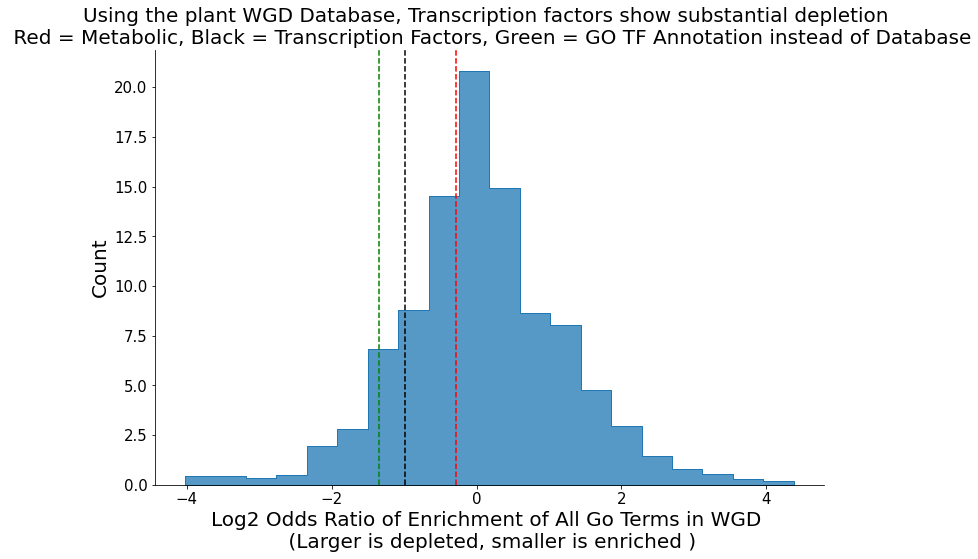

In [108]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = fishers_results_wgdd_database, x = 'Log2 Odds Ratio',element = 'step',stat = 'percent', bins = 20)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Log2 Odds Ratio of Enrichment of All Go Terms in WGD \n (Larger is depleted, smaller is enriched )", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.axvline(x = -.99, color = 'k', linestyle = '--')
ax.axvline(x = -0.285, color = 'r', linestyle = '--')
ax.axvline(x = -1.34, color = 'g', linestyle = '--')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("Using the plant WGD Database, Transcription factors show substantial depletion \n Red = Metabolic, Black = Transcription Factors, Green = GO TF Annotation instead of Database", fontsize = 20)
plt.xticks(fontsize = 15,)
plt.yticks(fontsize = 15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

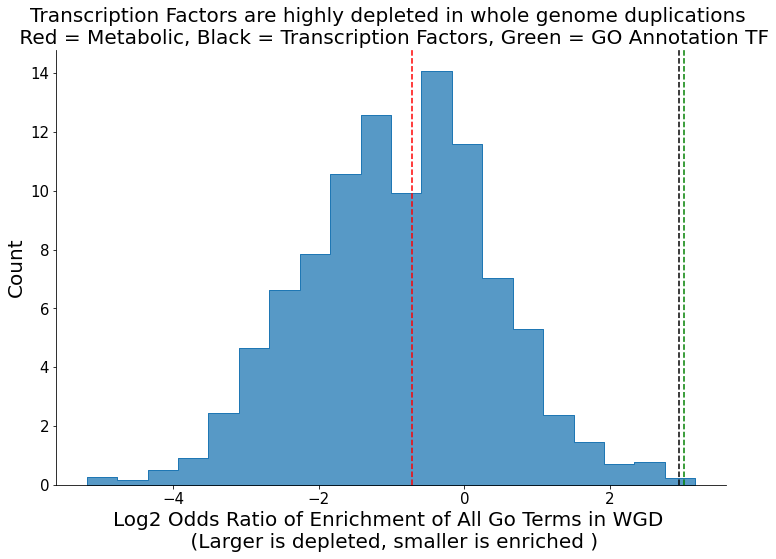

In [115]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = fishers_results_wg, x = 'Log2 Odds Ratio',element = 'step',stat = 'percent', bins = 20)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Log2 Odds Ratio of Enrichment of All Go Terms in WGD \n (Larger is depleted, smaller is enriched )", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.axvline(x = 2.941929, color = 'k', linestyle = '--')
ax.axvline(x = -0.7244788, color = 'r', linestyle = '--')
ax.axvline(x = 3.02, color = 'g', linestyle = '--')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("Transcription Factors are highly depleted in whole genome duplications \n Red = Metabolic, Black = Transcription Factors, Green = GO Annotation TF", fontsize = 20)
plt.xticks(fontsize = 15,)
plt.yticks(fontsize = 15)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

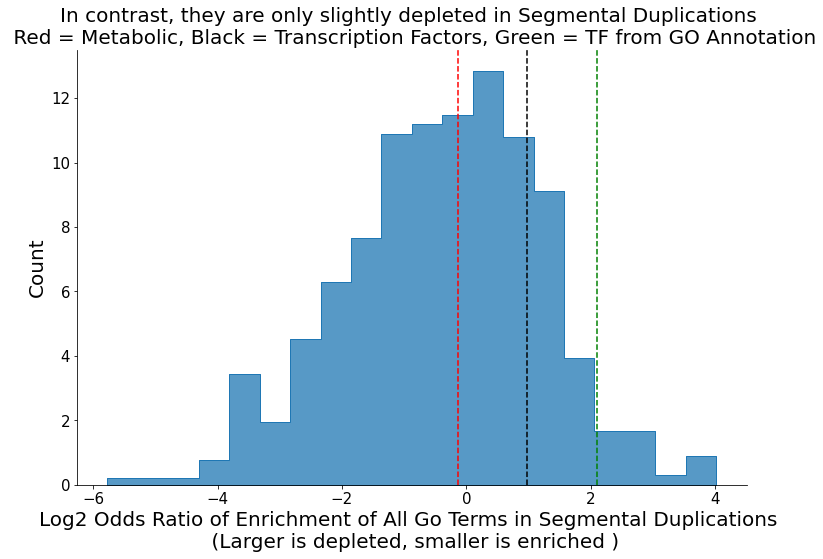

In [112]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
ax = sns.histplot(data = fishers_results_segdup, x = 'Log2 Odds Ratio',element = 'step',stat = 'percent', bins = 20)
plt.ylabel("Count", fontsize = 20)
plt.xlabel("Log2 Odds Ratio of Enrichment of All Go Terms in Segmental Duplications \n (Larger is depleted, smaller is enriched )", fontsize = 20)
sns.despine()

ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.axvline(x = 0.977743, color = 'k', linestyle = '--')
ax.axvline(x = -0.135929, color = 'r', linestyle = '--')
ax.axvline(x = 2.11, color = 'g', linestyle = '--')
#plt.xlim((-7,7))
# plt.ylim((0, 1250))
plt.title("In contrast, they are only slightly depleted in Segmental Duplications \n Red = Metabolic, Black = Transcription Factors, Green = TF from GO Annotation", fontsize = 20)
plt.xticks(fontsize = 15,)
plt.yticks(fontsize = 15)